# Classification implementation...
print("classification")

In [1]:
# in the basic terms classfication roughly has 5 terms for implemenetation:
# 1. Input data and features
# 2. Label and classes
# 3. Model and training data
# 4. Testing data
# 5. Accuracy

In [6]:
# import necessary libraries....

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

In [9]:
# input data with features: fruits and their sizes and colors
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Watermelon', 'Grape', 'Lemon'],
    'Color': ['Red', 'Yellow', 'Orange', 'Green', 'Purple', 'Yellow'],
    'Size': ['Small', 'Small', 'Small', 'Large', 'Small', 'Small']
}

df = pd.DataFrame(data);
df

,Fruit,Color,Size
0,Apple,Red,Small
1,Banana,Yellow,Small
2,Orange,Orange,Small
3,Watermelon,Green,Large
4,Grape,Purple,Small
5,Lemon,Yellow,Small


In [11]:
# labels: fruits needs to be identified based on it's size and color.  model will be trained to get correct output(fruit)

labels = df["Fruit"]
labels

0         Apple
1        Banana
2        Orange
3    Watermelon
4         Grape
5         Lemon
Name: Fruit, dtype: object

In [14]:
# filter out input features(size, color) from dataset and encode them into binary form for better ML understanding

df_encoded = pd.get_dummies(df[["Color", "Size"]])
# df_encoded

In [34]:
# split data into train-test categories....

X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.3, random_state=42);

# it's time to train the model for given input features and labels(classes)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
X_train

,Color_Green,Color_Orange,Color_Purple,Color_Red,Color_Yellow,Size_Large,Size_Small
5,False,False,False,False,True,False,True
2,False,True,False,False,False,False,True
4,False,False,True,False,False,False,True
3,True,False,False,False,False,True,False


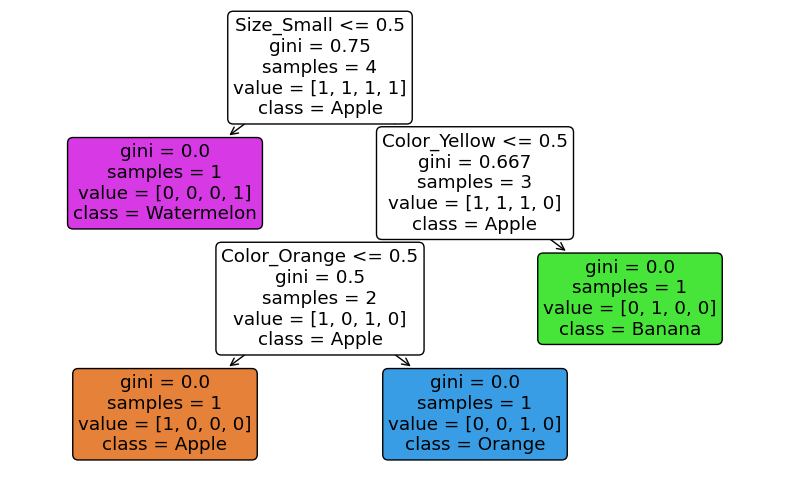

In [28]:
# visualize the decision tree for given model

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=list(X_train.columns), class_names=list(labels.unique()), filled=True, rounded=True)
plt.show()

In [38]:
# test the model on unseen data to produce predictions
test_data = {
    'Color': ['Red', 'Yellow', 'Orange', 'Green'],
    'Size': ['Small', 'Small', 'Small', 'Large']
}

df_test = pd.DataFrame(test_data)

df_test_encoded = pd.get_dummies(df_test)
df_test_encoded

,Color_Green,Color_Orange,Color_Red,Color_Yellow,Size_Large,Size_Small
0,False,False,True,False,False,True
1,False,False,False,True,False,True
2,False,True,False,False,False,True
3,True,False,False,False,True,False


In [42]:
# predictions by the same model
df_test_encoded = pd.get_dummies(df_test)
df_test_encoded = df_test_encoded.reindex(columns=all_columns, fill_value=0)



In [46]:
predictions = model.predict(df_test_encoded)

accuracy = accuracy_score(['Apple', 'Banana', 'Orange', 'Watermelon'], predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%
